# Polynomial Regression

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In [2]:
weather_data_p = pd.read_csv("WeatherDataP.csv")

weather_data_p

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


### Set our input x to Pressure, use [[]] to convert to 2D array suitable for model input

Text(0, 0.5, 'Humidity')

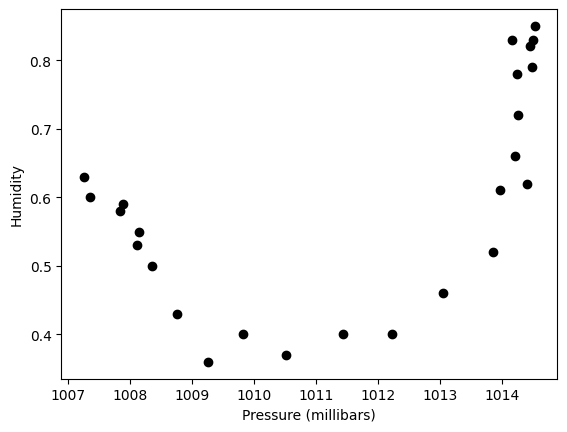

In [3]:
X = weather_data_p[["Pressure (millibars)"]]
y = weather_data_p.Humidity

# Produce a scatter graph of Humidity against Pressure
plt.scatter(X, y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

### Polynomial Feature Transformation


In [4]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
 
pre_process = PolynomialFeatures(degree=2)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

### Creating Polynomial Features DataFrame


In [5]:
df_X_poly = pd.DataFrame(X_poly)
df_X_poly.columns = ['1','x','x_squared']
df_X_poly.head()

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06


In [6]:
df_X_poly.head()


,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06


### Training Polynomial Regression Model


In [7]:
pr_model = LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)

# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)

### Plotting Polynomial Regression Fit


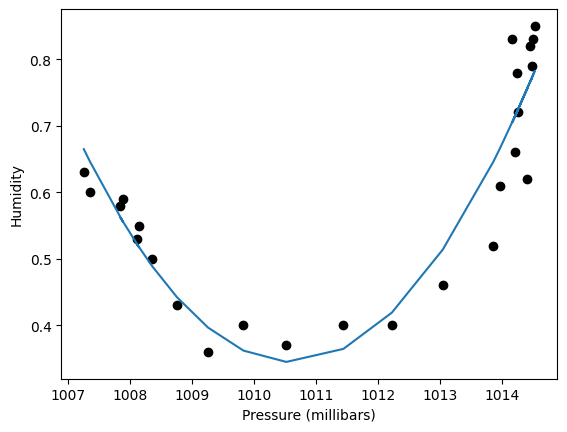

In [8]:
plt.scatter(X, y, c = "Black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, y_pred)

### Model Evaluation and Prediction


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_squared_error(y, y_pred)


0.0033583683721741513

In [10]:
y_new = pr_model.predict(pre_process.fit_transform([[1007]]))
y_new

array([0.7164631])

In [11]:
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_

theta0, theta1, theta2

(29167.74604359977, -57.72254542077549, 0.028558357296560644)

### Conclusion
Polynomial Regression effectively models the nonlinear relationship between atmospheric pressure and humidity in the weather dataset. By transforming the pressure feature into polynomial terms, the model fits the data better than a simple linear regression, capturing the curvature and providing more accurate predictions.

The degree-2 polynomial model demonstrated a strong fit, as visualized by the regression curve plotted against the original data points. Evaluation metrics like mean squared error confirm reasonable prediction accuracy, reflecting the model's ability to generalize within the data range.

This approach illustrates how polynomial regression can be used to uncover complex dependencies in environmental variables, providing valuable insights for weather analysis and forecasting. Model coefficients further describe the quantitative influence of pressure and its squared term on humidity.

Overall, polynomial regression serves as a powerful tool for capturing nonlinearities in meteorological datasets, improving prediction quality while maintaining interpretability.